In [1]:
#Keras Model

In [11]:
from keras.datasets import mnist
from keras.models import load_model,Model
from keras.layers import Dense,Input,Activation
from keras.utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard,ModelCheckpoint

import matplotlib.pyplot as plt

In [2]:
#Loading the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
NUM_CLASSES = 10
NUM_TUPLES = x_train.shape[0]

In [3]:
#Preprocessing Steps

#Reshaping images into single dimension arrays
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32')

#Normalising the data
x_train /= 255.
x_test /= 255.

#Converting labels to categorical datastructure
y_train = to_categorical(y_train,NUM_CLASSES)
y_test = to_categorical(y_test,NUM_CLASSES)

#Splitting training set into validation set
train_size = int(NUM_TUPLES*0.8)
x_validation = x_train[train_size:]
y_validation = y_train[train_size:]
x_train = x_train[0:train_size]
y_train = y_train[0:train_size]

In [4]:
x_validation.shape

(12000, 784)

In [14]:
def MNN_Classifier(no_of_hidden_layer_neurons,optimizer,activation):
    
    input_layer = Input(shape=(784,))
    
    il = Dense(no_of_hidden_layer_neurons,activation=activation)(input_layer)
    #hl1 = Dense(64,activation='relu')(il)

    
    ol = Dense(10,activation='softmax')(il)
    
    classifier = Model(inputs=input_layer,outputs=ol)
    
    classifier.compile(optimizer = optimizer,loss='categorical_crossentropy', metrics = ['accuracy'])
    
    return classifier
    

In [17]:
mnist_classifier = MNN_Classifier(784,'adam','relu')
mnist_classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [7]:
train_history = mnist_classifier.fit(x_train,y_train,batch_size=32,epochs = 10,verbose=True,shuffle=True,
                                     validation_data = (x_validation,y_validation))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 32s 667us/step - loss: 0.2106 - acc: 0.9372 - val_loss: 0.1110 - val_acc: 0.9657
Epoch 2/10
48000/48000 [==============================] - 33s 695us/step - loss: 0.0844 - acc: 0.9742 - val_loss: 0.0939 - val_acc: 0.9713
Epoch 3/10
48000/48000 [==============================] - 35s 725us/step - loss: 0.0544 - acc: 0.9831 - val_loss: 0.0843 - val_acc: 0.9750
Epoch 4/10
48000/48000 [==============================] - 31s 644us/step - loss: 0.0375 - acc: 0.9873 - val_loss: 0.0757 - val_acc: 0.9768
Epoch 5/10
48000/48000 [==============================] - 30s 629us/step - loss: 0.0272 - acc: 0.9911 - val_loss: 0.0872 - val_acc: 0.9782
Epoch 6/10
48000/48000 [==============================] - 34s 704us/step - loss: 0.0218 - acc: 0.9929 - val_loss: 0.0789 - val_acc: 0.9795
Epoch 7/10
48000/48000 [==============================] - 36s 750us/step - loss: 0.0169 - acc: 0.9943 - val_loss: 0.

In [8]:
test_losses = mnist_classifier.evaluate(x_test,y_test,batch_size=32,verbose=True)

10000/10000 [==============================] - 1s 105us/step


In [10]:
print "Testing Accuracy : " + str(test_losses[1]*100)

Testing Accuracy : 97.96


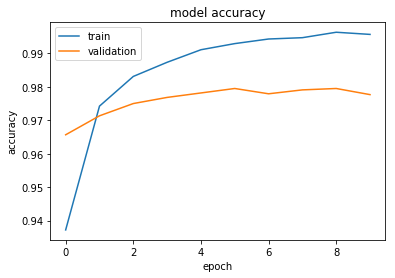

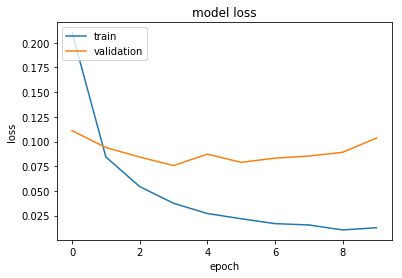

In [12]:
#Plotting Results
#Accuracy vs Epochs
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Loss vs Epochs
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
mnist_classifier1 = MNN_Classifier(256,'adam','relu')
train_history1 = mnist_classifier.fit(x_train,y_train,batch_size=32,epochs = 10,verbose=True,shuffle=True,
                                     validation_data = (x_validation,y_validation))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 28s 585us/step - loss: 0.2126 - acc: 0.9364 - val_loss: 0.1154 - val_acc: 0.9645
Epoch 2/10
48000/48000 [==============================] - 28s 584us/step - loss: 0.0845 - acc: 0.9743 - val_loss: 0.0912 - val_acc: 0.9719
Epoch 3/10
48000/48000 [==============================] - 32s 658us/step - loss: 0.0544 - acc: 0.9825 - val_loss: 0.0805 - val_acc: 0.9770
Epoch 4/10
48000/48000 [==============================] - 29s 598us/step - loss: 0.0377 - acc: 0.9877 - val_loss: 0.0878 - val_acc: 0.9738
Epoch 5/10
48000/48000 [==============================] - 32s 661us/step - loss: 0.0268 - acc: 0.9907 - val_loss: 0.0973 - val_acc: 0.9742
Epoch 6/10
48000/48000 [==============================] - 29s 606us/step - loss: 0.0214 - acc: 0.9927 - val_loss: 0.0803 - val_acc: 0.9788
Epoch 7/10
48000/48000 [==============================] - 29s 613us/step - loss: 0.0159 - acc: 0.9949 - val_loss: 0.

In [19]:
mnist_classifier2 = MNN_Classifier(128,'adam','relu')
train_history2 = mnist_classifier.fit(x_train,y_train,batch_size=32,epochs = 10,verbose=True,shuffle=True,
                                     validation_data = (x_validation,y_validation))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 37s 771us/step - loss: 0.0109 - acc: 0.9960 - val_loss: 0.0966 - val_acc: 0.9788
Epoch 2/10
48000/48000 [==============================] - 37s 764us/step - loss: 0.0100 - acc: 0.9970 - val_loss: 0.1126 - val_acc: 0.9763
Epoch 3/10
48000/48000 [==============================] - 36s 747us/step - loss: 0.0080 - acc: 0.9974 - val_loss: 0.1003 - val_acc: 0.9778
Epoch 4/10
48000/48000 [==============================] - 28s 583us/step - loss: 0.0092 - acc: 0.9965 - val_loss: 0.1315 - val_acc: 0.9753
Epoch 5/10
48000/48000 [==============================] - 28s 582us/step - loss: 0.0082 - acc: 0.9971 - val_loss: 0.0998 - val_acc: 0.9807
Epoch 6/10
48000/48000 [==============================] - 28s 586us/step - loss: 0.0068 - acc: 0.9977 - val_loss: 0.1203 - val_acc: 0.9788
Epoch 7/10
48000/48000 [==============================] - 28s 580us/step - loss: 0.0066 - acc: 0.9976 - val_loss: 0.

In [20]:
mnist_classifier3 = MNN_Classifier(64,'adam','relu')
train_history3 = mnist_classifier.fit(x_train,y_train,batch_size=32,epochs = 10,verbose=True,shuffle=True,
                                     validation_data = (x_validation,y_validation))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 31s 637us/step - loss: 0.0060 - acc: 0.9984 - val_loss: 0.1517 - val_acc: 0.9757
Epoch 2/10
48000/48000 [==============================] - 40s 826us/step - loss: 0.0060 - acc: 0.9980 - val_loss: 0.1353 - val_acc: 0.9765
Epoch 3/10
48000/48000 [==============================] - 41s 854us/step - loss: 0.0066 - acc: 0.9983 - val_loss: 0.1128 - val_acc: 0.9807
Epoch 4/10
48000/48000 [==============================] - 41s 852us/step - loss: 0.0073 - acc: 0.9979 - val_loss: 0.1679 - val_acc: 0.9746
Epoch 5/10
48000/48000 [==============================] - 41s 864us/step - loss: 0.0089 - acc: 0.9976 - val_loss: 0.1285 - val_acc: 0.9789
Epoch 6/10
48000/48000 [==============================] - 41s 851us/step - loss: 0.0057 - acc: 0.9982 - val_loss: 0.1284 - val_acc: 0.9800
Epoch 7/10
48000/48000 [==============================] - 43s 886us/step - loss: 0.0045 - acc: 0.9986 - val_loss: 0.

In [ ]:
#Accuracy comparison for different number of hidden layer neurons
plt.plot(train_history.history['val_acc'])
plt.plot(train_history1.history['val_acc'])
plt.plot(train_history2.history['val_acc'])
plt.plot(train_history3.history['val_acc'])

plt.title('Accuracy comparison for different number of hidden layer neurons')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['784', '256','128','64'], loc='upper left')
plt.show()
